# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

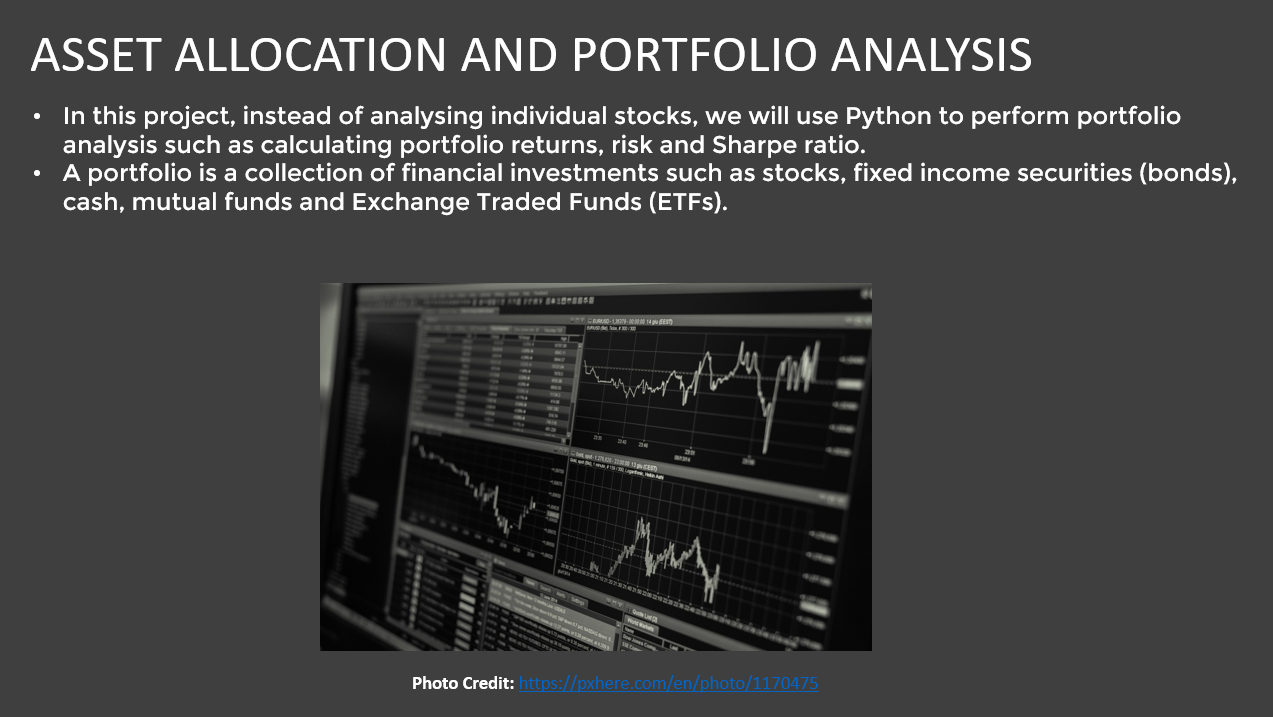

# TASK #2: IMPORT LIBRARIES & DATASETS AND PERFORM DATA VISUALIZATION

In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Read the stock data file
stocks_df = pd.read_csv('stock_data.csv')
stocks_df

Date          FB       TWTR        NFLX
0     2013-11-07   47.560001  44.900002   46.694286
1     2013-11-08   47.529999  41.650002   47.842857
2     2013-11-11   46.200001  42.900002   48.272858
3     2013-11-12   46.610001  41.900002   47.675713
4     2013-11-13   48.709999  42.599998   47.897144
...          ...         ...        ...         ...
1707  2020-08-20  269.010010  38.959999  497.899994
1708  2020-08-21  267.010010  39.259998  492.309998
1709  2020-08-24  271.390015  40.490002  488.809998
1710  2020-08-25  280.820007  40.549999  490.579987
1711  2020-08-26  303.910004  41.080002  547.530029

[1712 rows x 4 columns]

In [3]:
# Function to plot interactive plot
def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

In [4]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

MINI CHALLENGE #1: 
- Create a function to perform scaling or normalization
- Apply the function to the stocks dataframe and perform sanity check

In [5]:
# Function to normalize the prices based on the initial price
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [6]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

# TASK #3: UNERSTAND THE CONCEPT OF ASSET ALLOCATION

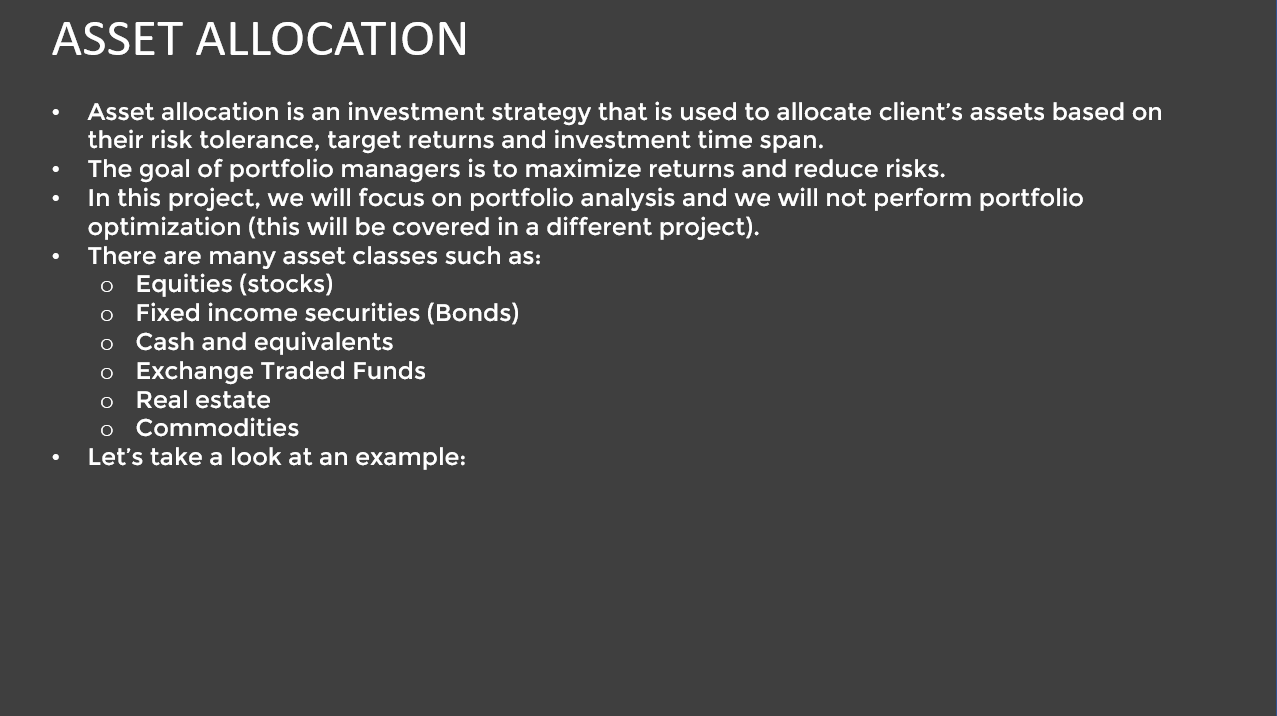

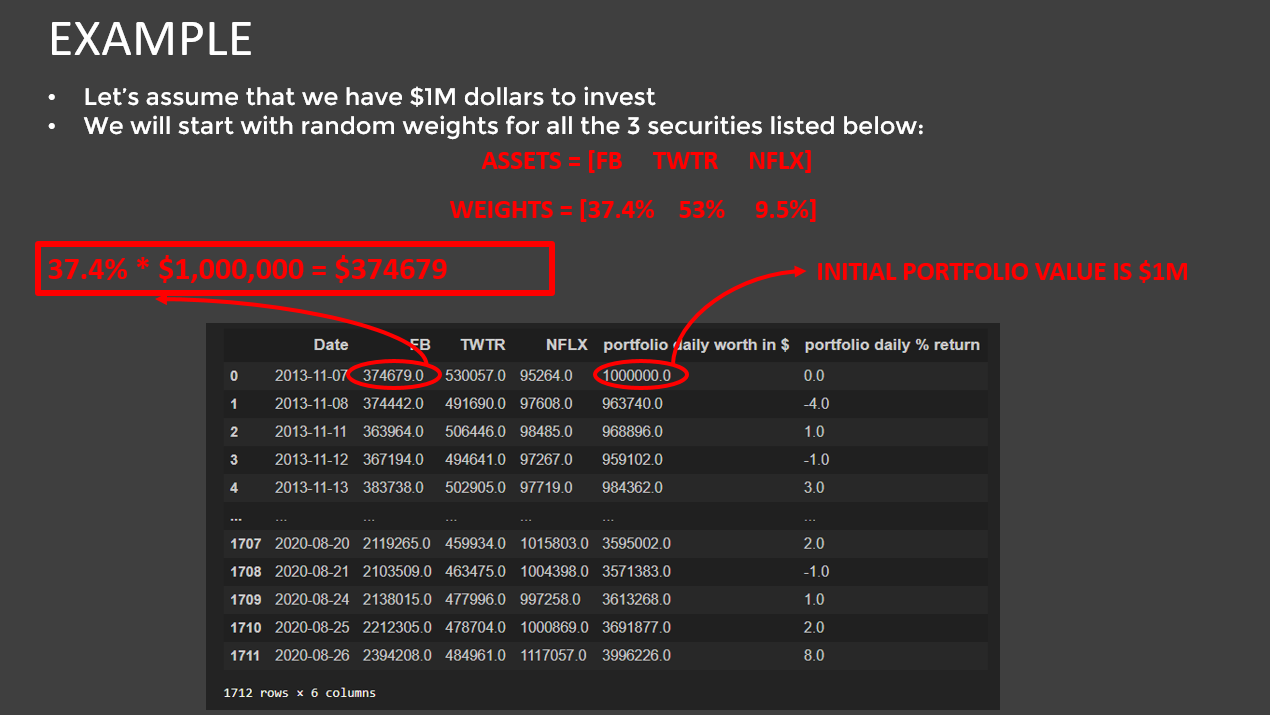

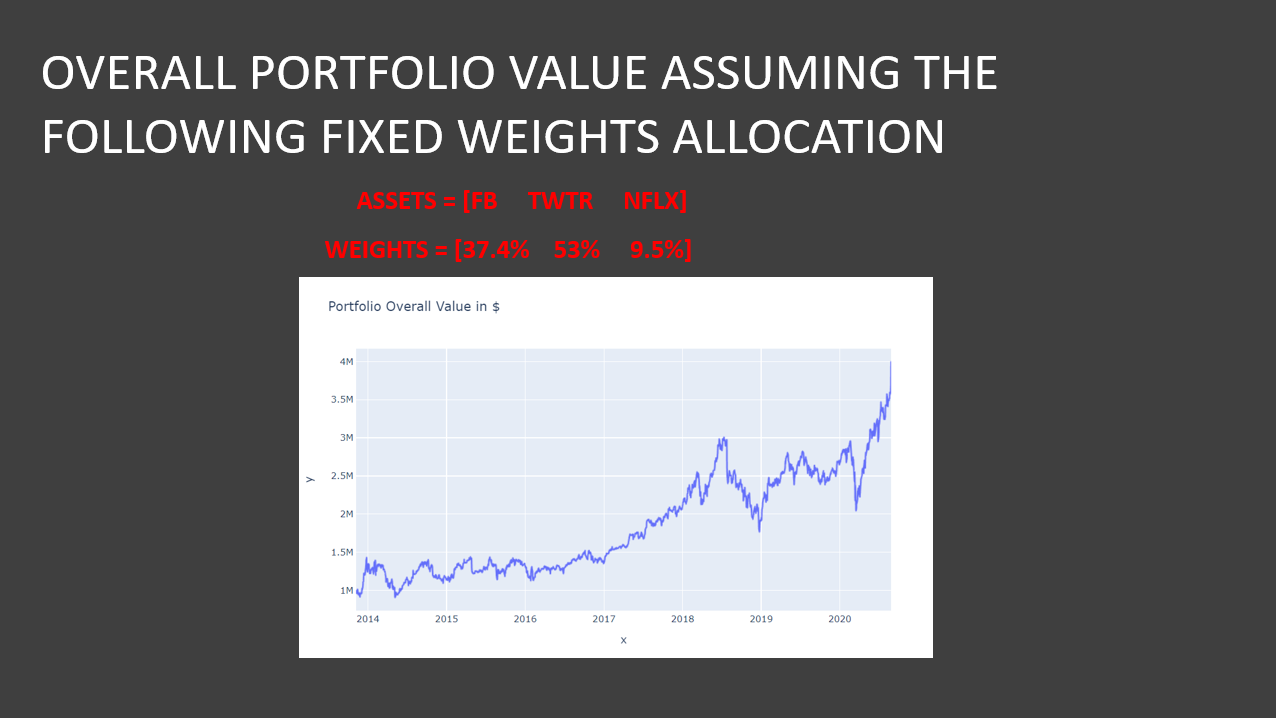

MINI CHALLENGE #2:
- What is the common advice that financial advisors generally give to retired seniors when it comes to asset allocations?

In [7]:
# The conventional wisdom is to subtract client's age from 100 to calculate the % of portolio that should be allocated to stocks
# For Example: If you're 30 years old, you should have 70% allocated to stocks
# If you are 75 years old, you should invest 25% in stocks (old retired seniors generally recommend a more stable low risk portfolio). 

# TASK #4: PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [8]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1 

# Set random seed
# np.random.seed(101)
np.random.seed()

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(3))

# Ensure that the sum of all weights are = 1
weights = weights / np.sum(weights) 
print(weights)

[0.17144453 0.41593358 0.41262189]


In [9]:
# Normalize the stock avalues 
df_portfolio = normalize(stocks_df)
df_portfolio

Date        FB      TWTR       NFLX
0     2013-11-07  1.000000  1.000000   1.000000
1     2013-11-08  0.999369  0.927617   1.024598
2     2013-11-11  0.971405  0.955457   1.033807
3     2013-11-12  0.980025  0.933185   1.021018
4     2013-11-13  1.024180  0.948775   1.025760
...          ...       ...       ...        ...
1707  2020-08-20  5.656224  0.867706  10.662975
1708  2020-08-21  5.614172  0.874387  10.543260
1709  2020-08-24  5.706266  0.901782  10.468304
1710  2020-08-25  5.904542  0.903118  10.506210
1711  2020-08-26  6.390034  0.914922  11.725846

[1712 rows x 4 columns]

In [10]:
df_portfolio.columns[1:]

Index(['FB', 'TWTR', 'NFLX'], dtype='object')

In [11]:
# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

Date            FB           TWTR          NFLX
0     2013-11-07  1.714445e+05  415933.575053  4.126219e+05
1     2013-11-08  1.713364e+05  385827.025861  4.227714e+05
2     2013-11-11  1.665420e+05  397406.467858  4.265712e+05
3     2013-11-12  1.680200e+05  388142.914261  4.212944e+05
4     2013-11-13  1.755901e+05  394627.364725  4.232511e+05
...          ...           ...            ...           ...
1707  2020-08-20  9.697286e+05  360908.038894  4.399777e+06
1708  2020-08-21  9.625190e+05  363687.095709  4.350380e+06
1709  2020-08-24  9.783081e+05  375081.303688  4.319452e+06
1710  2020-08-25  1.012301e+06  375637.089114  4.335092e+06
1711  2020-08-26  1.095536e+06  380546.800311  4.838341e+06

[1712 rows x 4 columns]

In [12]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
df_portfolio

Date            FB           TWTR          NFLX  \
0     2013-11-07  1.714445e+05  415933.575053  4.126219e+05   
1     2013-11-08  1.713364e+05  385827.025861  4.227714e+05   
2     2013-11-11  1.665420e+05  397406.467858  4.265712e+05   
3     2013-11-12  1.680200e+05  388142.914261  4.212944e+05   
4     2013-11-13  1.755901e+05  394627.364725  4.232511e+05   
...          ...           ...            ...           ...   
1707  2020-08-20  9.697286e+05  360908.038894  4.399777e+06   
1708  2020-08-21  9.625190e+05  363687.095709  4.350380e+06   
1709  2020-08-24  9.783081e+05  375081.303688  4.319452e+06   
1710  2020-08-25  1.012301e+06  375637.089114  4.335092e+06   
1711  2020-08-26  1.095536e+06  380546.800311  4.838341e+06   

      portfolio daily worth in $  
0                   1.000000e+06  
1                   9.799348e+05  
2                   9.905197e+05  
3                   9.774573e+05  
4                   9.934686e+05  
...                          ...  
1707                5.730414e+06  
1708                5.676586e+06  
1709                5.672841e+06  
1710                5.723031e+06  
1711                6.314424e+06  

[1712 rows x 5 columns]

In [13]:
# Let's calculate the portfolio daily return 
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 

df_portfolio.round(decimals = 0)

Date         FB      TWTR       NFLX  portfolio daily worth in $  \
0     2013-11-07   171445.0  415934.0   412622.0                   1000000.0   
1     2013-11-08   171336.0  385827.0   422771.0                    979935.0   
2     2013-11-11   166542.0  397406.0   426571.0                    990520.0   
3     2013-11-12   168020.0  388143.0   421294.0                    977457.0   
4     2013-11-13   175590.0  394627.0   423251.0                    993469.0   
...          ...        ...       ...        ...                         ...   
1707  2020-08-20   969729.0  360908.0  4399777.0                   5730414.0   
1708  2020-08-21   962519.0  363687.0  4350380.0                   5676586.0   
1709  2020-08-24   978308.0  375081.0  4319452.0                   5672841.0   
1710  2020-08-25  1012301.0  375637.0  4335092.0                   5723031.0   
1711  2020-08-26  1095536.0  380547.0  4838341.0                   6314424.0   

      portfolio daily % return  
0                          0.0  
1                         -2.0  
2                          1.0  
3                         -1.0  
4                          2.0  
...                        ...  
1707                       3.0  
1708                      -1.0  
1709                      -0.0  
1710                       1.0  
1711                      10.0  

[1712 rows x 6 columns]

MINI CHALLENGE #3: 
- Try at least 3 another random weights allocation and rerun the code. 
- Compare the final portfolio value on Aug 26th, 2020 to its initial value ($1M) on November 7th, 2013. Do you notice a big difference? Comment on your answer.

In [14]:
# remove the seed value of 101, run the code 3 times, and record the final portolio value on the last day (Aug 26th, 2020)
np.random.seed()

# Portfolio Value Run #1 = $6,977,352 and weights = [0.36740875 0.25789378 0.37469747]
# Portfolio Value Run #2 = $8,828,018 and weights = [0.39360079 0.0737817  0.53261751]
# Portfolio Value Run #3 = $9,256,843 and weights = [0.31229238 0.07424618 0.61346144]

# TASK #5: PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [15]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and retun:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio 
# (3) Daily return 

def portfolio_allocation(df, weights):
    
    df_portfolio = df.copy()
    
    # Normalize the stock avalues 
    df_portfolio = normalize(df_portfolio)
    
    for counter, stock in enumerate(df_portfolio.columns[1:]):
        df_portfolio[stock] = df_portfolio[stock] * weights[counter]
        df_portfolio[stock] = df_portfolio[stock] * 1000000
    
    df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
    
    df_portfolio['portfolio daily % return'] = 0.0000
    
    for i in range(1, len(stocks_df)):
        
        # Calculate the percentage of change from the previous day
        df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
    
    # set the value of first row to zero, as previous value is not available
    df_portfolio['portfolio daily % return'][0] = 0
    return df_portfolio

In [16]:
# Call the function
df_portfolio = portfolio_allocation(stocks_df, weights)
df_portfolio

Date            FB           TWTR          NFLX  \
0     2013-11-07  1.714445e+05  415933.575053  4.126219e+05   
1     2013-11-08  1.713364e+05  385827.025861  4.227714e+05   
2     2013-11-11  1.665420e+05  397406.467858  4.265712e+05   
3     2013-11-12  1.680200e+05  388142.914261  4.212944e+05   
4     2013-11-13  1.755901e+05  394627.364725  4.232511e+05   
...          ...           ...            ...           ...   
1707  2020-08-20  9.697286e+05  360908.038894  4.399777e+06   
1708  2020-08-21  9.625190e+05  363687.095709  4.350380e+06   
1709  2020-08-24  9.783081e+05  375081.303688  4.319452e+06   
1710  2020-08-25  1.012301e+06  375637.089114  4.335092e+06   
1711  2020-08-26  1.095536e+06  380546.800311  4.838341e+06   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.799348e+05                 -2.006516  
2                   9.905197e+05                  1.080157  
3                   9.774573e+05                 -1.318738  
4                   9.934686e+05                  1.638051  
...                          ...                       ...  
1707                5.730414e+06                  2.539826  
1708                5.676586e+06                 -0.939330  
1709                5.672841e+06                 -0.065974  
1710                5.723031e+06                  0.884740  
1711                6.314424e+06                 10.333567  

[1712 rows x 6 columns]

# TASK #6: PERORM PORTFOLIO DATA VISUALIZATION

In [17]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

In [18]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

In [19]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

In [20]:
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'], title= 'Portfolio Overall Value in $')
fig.show()

MINI CHALLENGE #4: 
- Try at least 3 another random weights allocations and visualize the overall portfolio value in $$. 
- Compare the final portfolio value on Aug 26th, 2020 to its initial value ($1M) on November 7th, 2013. Do you notice a big difference? Comment on your answer.

In [21]:
# 3 Rerun the code 3 times and visualize the portfolio value in $$ (no changes are necessary)

# TASK #7: UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

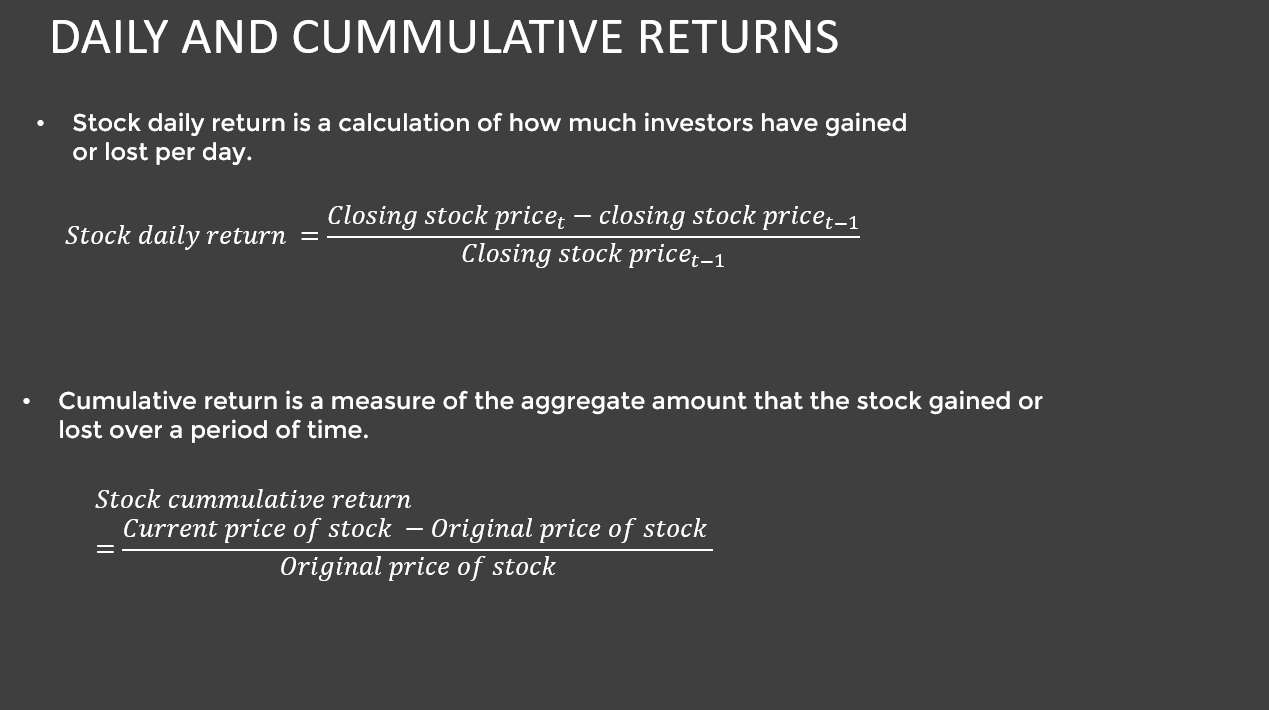

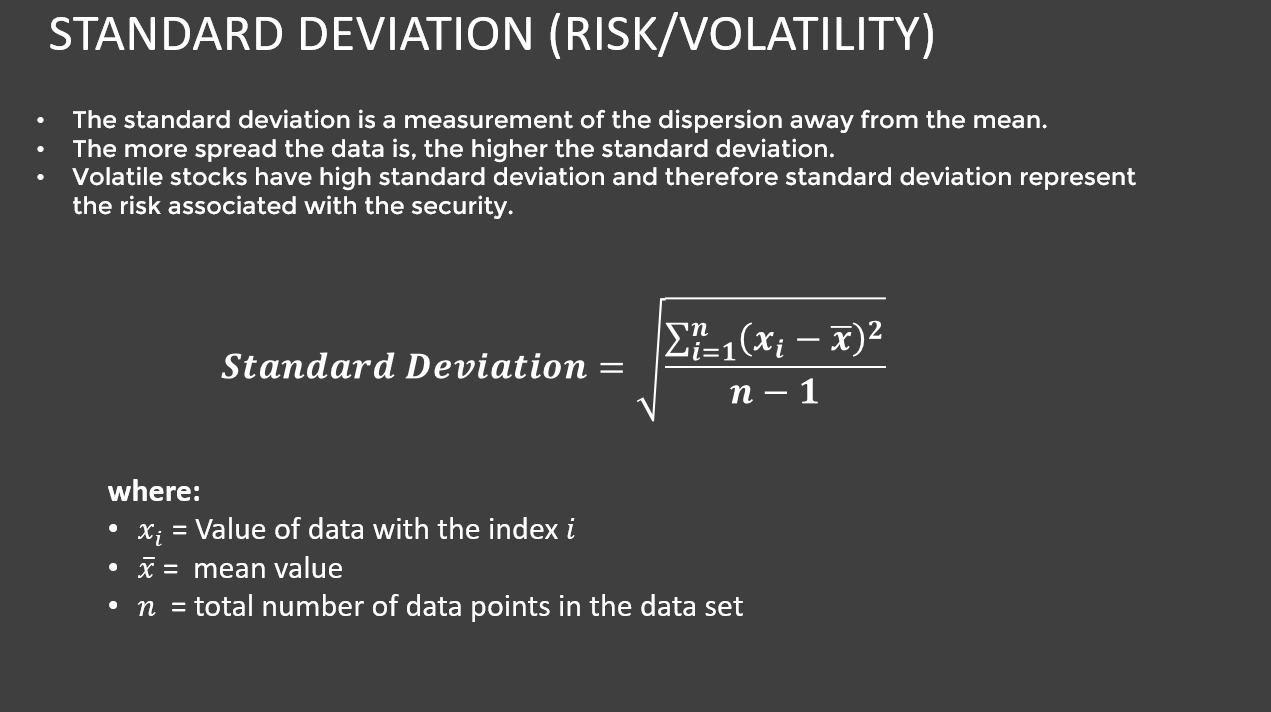

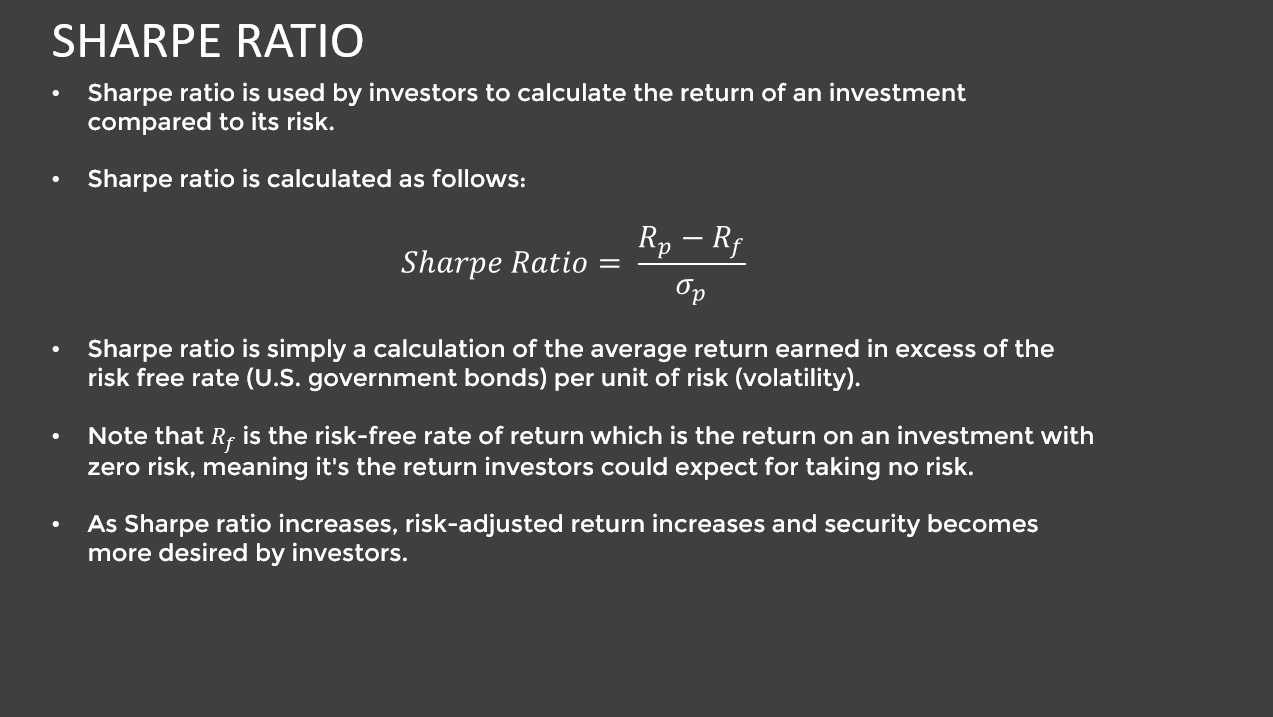

# TASK #8: CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [22]:
df_portfolio

Date            FB           TWTR          NFLX  \
0     2013-11-07  1.714445e+05  415933.575053  4.126219e+05   
1     2013-11-08  1.713364e+05  385827.025861  4.227714e+05   
2     2013-11-11  1.665420e+05  397406.467858  4.265712e+05   
3     2013-11-12  1.680200e+05  388142.914261  4.212944e+05   
4     2013-11-13  1.755901e+05  394627.364725  4.232511e+05   
...          ...           ...            ...           ...   
1707  2020-08-20  9.697286e+05  360908.038894  4.399777e+06   
1708  2020-08-21  9.625190e+05  363687.095709  4.350380e+06   
1709  2020-08-24  9.783081e+05  375081.303688  4.319452e+06   
1710  2020-08-25  1.012301e+06  375637.089114  4.335092e+06   
1711  2020-08-26  1.095536e+06  380546.800311  4.838341e+06   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.799348e+05                 -2.006516  
2                   9.905197e+05                  1.080157  
3                   9.774573e+05                 -1.318738  
4                   9.934686e+05                  1.638051  
...                          ...                       ...  
1707                5.730414e+06                  2.539826  
1708                5.676586e+06                 -0.939330  
1709                5.672841e+06                 -0.065974  
1710                5.723031e+06                  0.884740  
1711                6.314424e+06                 10.333567  

[1712 rows x 6 columns]

In [23]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))

Cummulative return of the portfolio is 531.4424090051941 %


In [24]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 2.18687796242097


In [25]:
# Calculate the average daily return 
print('Average daily return of the portfolio is {} %'.format(df_portfolio['portfolio daily % return'].mean()))

Average daily return of the portfolio is 0.13165278186818885 %


In [26]:
# Portfolio sharpe ratio
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 0.9556651799100535


MINI CHALLENGE #5: 
- Try at least 3 different random weights allocation, rerun the code and compare sharpe ratios, daily return and cummulative returns.

In [27]:
# Rerun the code with 3 random values and compare metrics

# WELL DONE!